<a href="https://colab.research.google.com/github/VSharma27/Major-Project-Logistic-Regression-Final-Code/blob/main/XGBoostMAJOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

**Reading Dataset**

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Understanding the Dataset**

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Checking for Missing Values**

In [6]:
df_missing_columns = df.isnull().sum()
df_missing_columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [8]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [9]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

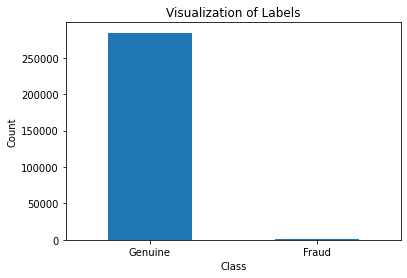

In [10]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'])
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")

plt.xticks(range(2), labels)
plt.show()

In [11]:
df.drop('Time', axis=1, inplace=True)
X = df.drop(['Class'], axis=1)
y = df['Class']

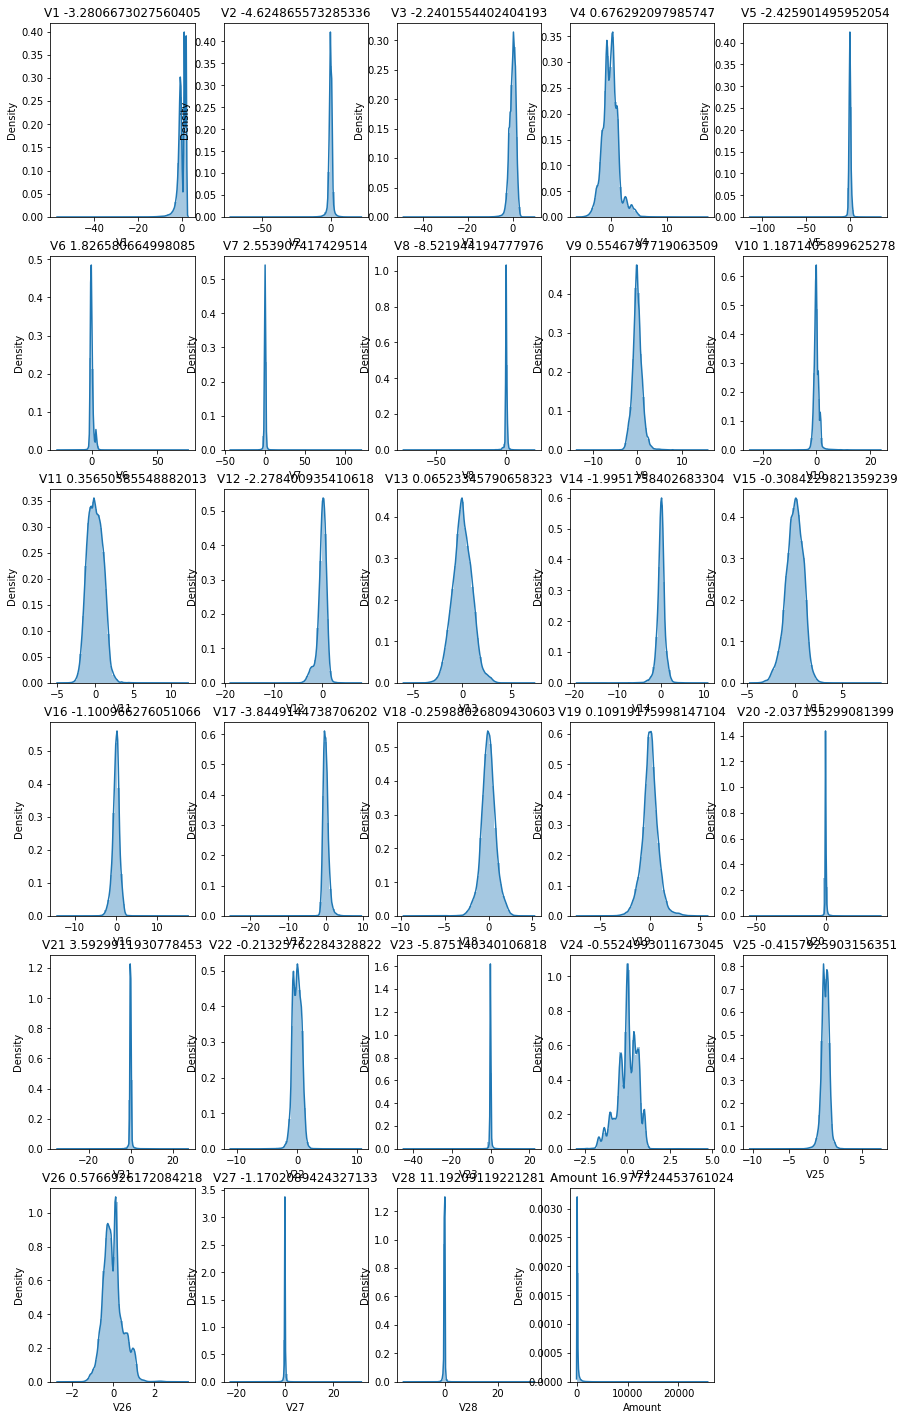

In [12]:
cols = X.columns
k=0
plt.figure(figsize=(15,25))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

**Mitigate skewness with PowerTransformer**

In [13]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X[cols] = pt.fit_transform(X)

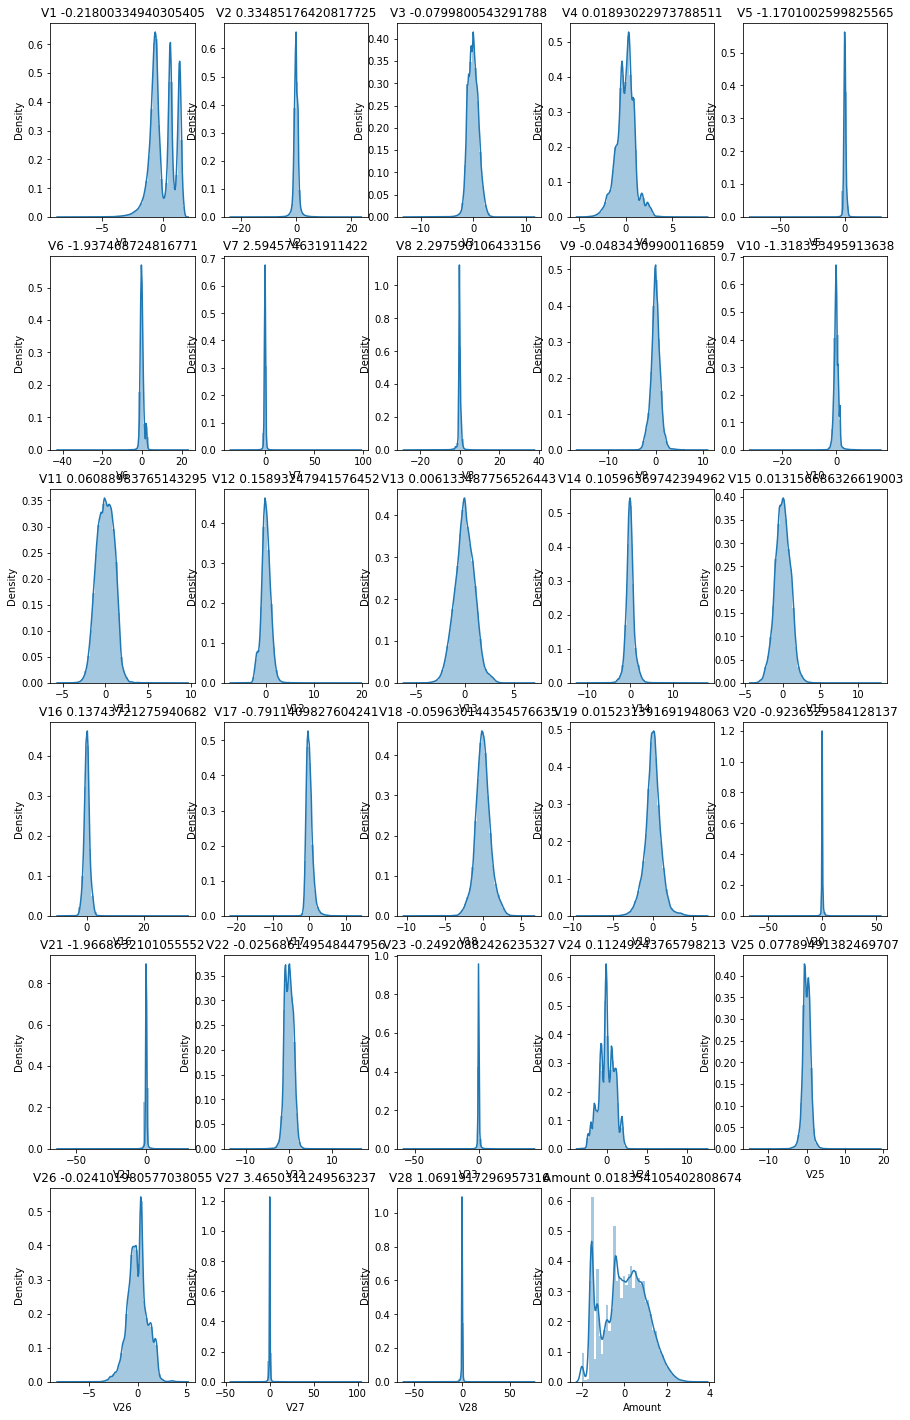

In [14]:
cols = X.columns
k=0
plt.figure(figsize=(15,25))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

**Splitting of Dataset**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=200)

**Feature Scaling**

In [16]:
scaler = StandardScaler()

In [17]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52820,0.609997,-0.167046,0.341444,0.241441,-0.464017,-0.298190,-0.195399,-0.188800,0.383150,-0.170055,-0.524431,0.547160,1.206443,-0.248862,1.510952,0.743744,-0.879803,-0.166400,-0.023231,0.139807,-0.101094,-0.443930,-0.041187,-0.206910,0.336927,0.995528,-0.084394,0.100391,0.596075
263369,1.452145,-0.156509,-0.817316,0.373670,-0.173927,-1.013700,0.102945,-0.347044,0.644199,0.133850,-0.857447,-0.190138,-0.787257,0.427591,0.090124,-0.158535,-0.318577,-0.919214,0.192049,-0.364559,-0.401764,-1.054414,0.564599,-0.060274,-0.654918,0.495583,-0.203487,-0.179633,-1.268009
117614,-1.295206,-0.358828,0.649724,-0.927054,0.218727,-0.060488,0.753962,-0.186807,0.520088,0.538603,1.370474,0.834587,0.432770,-0.489599,0.236800,0.643729,-1.155209,-0.404823,-0.802490,0.197921,-0.446775,-0.065840,0.247659,-0.495426,-0.293484,1.481361,1.139574,1.659247,1.256815
51000,-1.030009,-1.086044,0.850925,0.728369,0.816809,-1.143289,-0.745560,0.079236,0.138991,0.258595,0.893058,0.279948,-1.003254,0.306935,-0.001374,-0.921327,0.618754,0.190260,3.084415,0.515673,0.052648,-0.211615,0.676178,0.632259,-1.694279,1.901162,-0.445758,1.709638,0.529873
151957,1.312159,-0.293718,-0.728464,0.379332,-0.172187,-0.432747,-0.120831,-0.272588,1.867121,-0.360322,1.587976,-1.315881,1.258720,2.111031,-1.855039,-0.692798,0.627091,0.263636,0.309702,-0.295345,0.034824,0.675957,0.023010,-0.070889,0.159243,0.367181,-0.166336,-0.214147,0.389813


In [19]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212072,0.921137,-1.053528,-1.790662,-0.210114,0.108071,-0.558267,0.694916,-0.518275,-1.215384,0.981332,0.202716,-0.433118,-0.986162,1.311705,-0.942459,-1.933022,-0.212221,1.784848,-0.406820,0.142877,0.202286,0.048660,-0.705369,0.655772,0.693601,1.788079,-0.531963,-0.097744,1.635491
7676,-1.269728,-0.461630,2.945654,2.351069,-0.360175,1.210538,-1.389357,1.135902,1.608396,0.467764,0.963946,-1.930135,0.168516,0.777681,-2.047418,-0.761236,2.127560,0.942123,1.202938,0.453317,-0.012756,0.866834,-0.807674,-0.063001,0.077913,1.048878,0.823677,-0.804783,0.619568
83150,0.686180,0.088341,0.236924,0.502343,-0.350533,-0.768664,0.057292,-0.279191,0.077405,-0.022772,-0.144843,0.360557,0.455543,0.157651,1.141007,0.278896,-0.542250,-0.677489,-0.138124,-0.113264,-0.341228,-1.010101,0.208261,0.597304,0.397123,0.289025,-0.083867,0.071771,-1.268009
125745,-0.495700,0.214654,1.750156,1.101505,-0.005909,0.862570,-0.072936,0.339463,0.583119,-0.516683,-1.721565,0.316858,-0.263162,-0.847313,-1.424304,-1.601616,1.195076,-1.040406,1.806646,0.009935,-0.440386,-0.665494,-0.094638,-0.765361,-0.643611,-0.844707,0.576616,0.478767,-0.580928
84402,-0.821222,-0.059006,1.013310,0.290647,0.747417,0.141649,0.442719,0.206489,-0.339097,-0.566547,0.557350,0.645692,-0.643096,0.160518,-1.444783,-0.374311,-0.435937,-0.244337,-0.627432,0.096309,0.167998,0.161777,-0.025932,-0.608289,0.360703,-1.055415,0.174672,0.380021,0.695457



**Building SMOTE**

In [20]:
sm = SMOTE(random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [21]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)


Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454894, 29)


In [22]:
from collections import Counter
counter=Counter(y_train_smote)
print('After Applying SMOTE', counter)

After Applying SMOTE Counter({0: 227447, 1: 227447})


**Building XGBOOST**

In [23]:
folds = 3
params = {'learning_rate': [0.3,0.6,0.8], 
          'n_estimators':[100,200,300],
          'max_depth':[4,7,10]}          

xgb_model = XGBClassifier()

model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = params, 
                        scoring= 'roc_auc', n_iter=6,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=6,
                   param_distributions={'learning_rate': [0.3, 0.6, 0.8],
                                        'max_depth': [4, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,187.144033,2.046015,1.189320,0.009148,100,7,0.3,"{'n_estimators': 100, 'max_depth': 7, 'learnin...",0.999985,0.999993,0.999997,0.999992,0.000005,1,1.0,1.0,1.0,1.0,0.000000e+00
1,174.901550,1.144107,1.093179,0.007875,100,10,0.6,"{'n_estimators': 100, 'max_depth': 10, 'learni...",0.999977,0.999993,0.999996,0.999989,0.000008,6,1.0,1.0,1.0,1.0,0.000000e+00
2,288.268797,4.432926,2.151918,0.023443,300,7,0.8,"{'n_estimators': 300, 'max_depth': 7, 'learnin...",0.999976,0.999994,0.999997,0.999989,0.000009,4,1.0,1.0,1.0,1.0,0.000000e+00
3,259.383609,1.212513,1.776093,0.008231,200,10,0.6,"{'n_estimators': 200, 'max_depth': 10, 'learni...",0.999976,0.999994,0.999996,0.999989,0.000009,5,1.0,1.0,1.0,1.0,6.409876e-17
4,229.190906,2.510753,1.640576,0.027607,200,7,0.8,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.999977,0.999994,0.999997,0.999989,0.000009,3,1.0,1.0,1.0,1.0,0.000000e+00
5,227.441384,4.219323,1.337373,0.012978,100,10,0.3,"{'n_estimators': 100, 'max_depth': 10, 'learni...",0.999977,0.999994,0.999997,0.999989,0.000009,2,1.0,1.0,1.0,1.0,0.000000e+00


In [25]:
model_cv.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}

In [26]:
params = {'learning_rate': 0.3,
          'max_depth': 7, 
          'n_estimators':100,
          'subsample':0.8,
         'objective':'binary:logistic'}
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.8})

**Prediction on the train set**

In [27]:
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [28]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224724   2723]
 [  6812 220635]]


In [29]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [46]:
print("Accuracy:",metrics.accuracy_score(y_train_smote, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9790390728389471
Sensitivity: 0.9148936170212766
Specificity: 0.9882710839136245


In [31]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227447
           1       0.99      0.97      0.98    227447

    accuracy                           0.98    454894
   macro avg       0.98      0.98      0.98    454894
weighted avg       0.98      0.98      0.98    454894



In [32]:
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [33]:
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9985330440280626

In [34]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

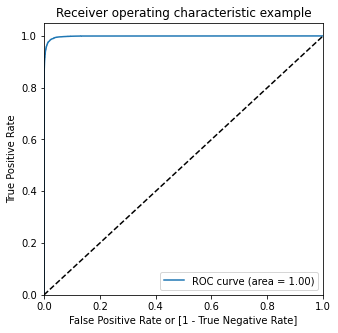

In [35]:
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [36]:
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [37]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56201   667]
 [    8    86]]


In [38]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.988149994733331
Sensitivity: 0.9148936170212766
Specificity: 0.9882710839136245


In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56868
           1       0.11      0.91      0.20        94

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [41]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [42]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9903372722796653

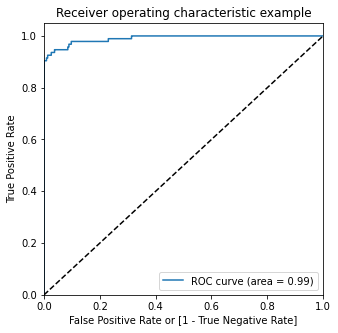

In [43]:
draw_roc(y_test, y_test_pred_proba)